# Problem 1 Softmax Function

We learned a ECOC in class which is a general way of turning any binary classifier into multiclass classifier. In this problem we will learn how to naturally extends logistics regression into multiclass classifier.

## Part 1) Softmax Function.

In logistic regression we model the probability for data $\vec{x}$ to be of class $y$ as

$$
    P(y | \vec{x};\vec{w}) = \begin{cases}
    \theta(\vec{w} \cdot \vec{x}) & \text{if } y = +1\\
    1 - \theta(\vec{w} \cdot \vec{x}) & \text{if } y = -1
    \end{cases}
$$
where $\theta(s) = \frac{1}{1+\exp(-s)} $

Now we want to extends it to multiclass problem. This means that $y$ can attain more than two values eg: ($1,2,3,\ldots,k$). Consider the softmax function
$$
P(y | \vec{x}; \vec{w_1}, \vec{w_2}, \ldots, \vec{w_k}) = \frac{\exp(\vec{w_y}\cdot\vec{x})}{\sum_{i=1\ldots k}{\exp(\vec{w_i}\cdot\vec{x})}}
$$

### Task 1.1 Knowing the Symbols

Given 
- $\vec{w_1} = [1,2,3]$
- $\vec{w_2} = [4,5,6]$
- $\vec{w_3} = [7,8,9]$
- $\vec{x} = [1,-2,-3]$

Find $P(1|\vec{x}; W)$, $P(2|\vec{x}; W)$, $P(3|\vec{x}; W)$.

Where $W = \{ \vec{w_1}, \vec{w_2}, \vec{w_3} \}$


In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from scipy.special import expit
from scipy.optimize import minimize
import warnings

In [2]:
w1 = [1., 2., 3.]
w2 = [4., 5., 6.]
w3 = [7., 8., 9.]
w = np.vstack((w1, w2, w3))

x = np.array([1., -2., -3.])

def calculate_prob(w, x, y):
    denom = [np.exp(np.dot(x, w[i])) for i in range(len(w))]
    return np.exp(np.dot(x, w[y-1])) / np.sum(denom)


In [3]:
sum = 0
for i in range(len(w)):
    sum += np.exp(np.dot(x, w[i]))
    print(np.exp(np.dot(x, w[i])))
print(sum)

w

6.14421235332821e-06
3.775134544279098e-11
2.3195228302435696e-16
6.144250104905605e-06


array([[1., 2., 3.],
       [4., 5., 6.],
       [7., 8., 9.]])

In [4]:
for i in range(1, 4):
    prob = calculate_prob(w, x, i) 
    print("P{}: {}".format(i, prob))

P1: 0.9999938557876469
P2: 6.1441746019827675e-06
P3: 3.7751113490507965e-11


### Task 1.2

Explain/proof why the range of 
$$
P(y | \vec{x}; \vec{w_1}, \vec{w_2}, \ldots, \vec{w_k}) = \frac{\exp(\vec{w_y}\cdot\vec{x})}{\sum_{i=1\ldots k}{\exp(\vec{w_i}\cdot\vec{x})}}
$$
is between $(0,1)$. Short explanation is suffice.


In [5]:
# The denominator is always >= 1
# If only 1 w vector exists, P = 1
# If > 1 w vector exists, P < 1

### Task 1.3

Given the data $y^{(i)}$ and $\vec{x}^{(i)}$ for $i=1\ldots n$.

Write the likelihood of obtaining this data.


In [6]:
# lh = P(y1|x1;w) * P(y2|x2;w) * ... * P(yn|xn;w)

In [7]:
def likelihood(w, x, y, n):
    prob = [calculate_prob(x, x[i], y[i]) for i in range(n)]
    return np.product(prob)

### Task 1.4

Suppose we want to use log-likelihood as our cost function(for minimize). Write down the cost function for obtaining the best $W$.

In [8]:
def cost(w):
    prob = [calculate_prob(x, x[i], y[i]) for i in range(n)]
    neg_log_lh = -np.sum(np.log(np.array(prob)))
    return neg_log_lh

## Part 2

Given what you found in 4. Consider the [Wine Dataset](http://archive.ics.uci.edu/ml/datasets/Wine). We want to build a system to predict the wine origin (1,2,3) which is at the first column for the datafile. The data is in **data/wine.csv**.

**Your Task**

- Build a multiclass classifier  using softmax function.

- Build show the [confusion matrix](http://www2.cs.uregina.ca/~dbd/cs831/notes/confusion_matrix/confusion_matrix.html) based on the train data. (This should be a 3x3 matrix)

- Feature such as hue will need a non-linear transformation.



In [16]:
df = pd.read_csv('data/wine.csv', header=None)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


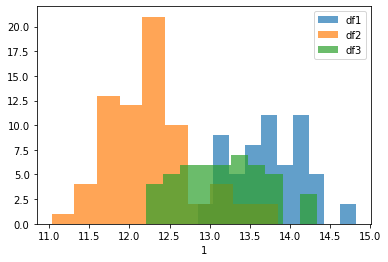

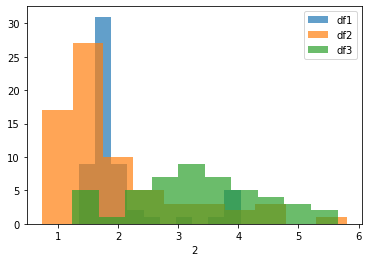

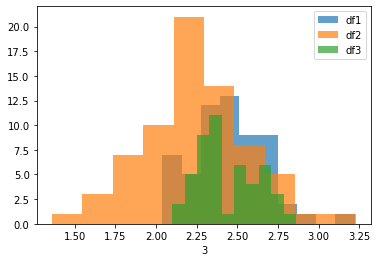

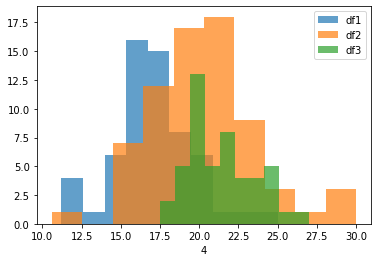

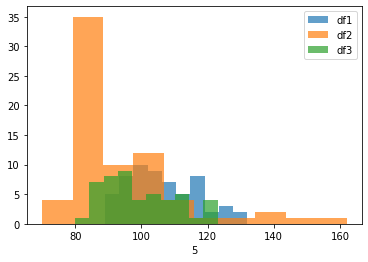

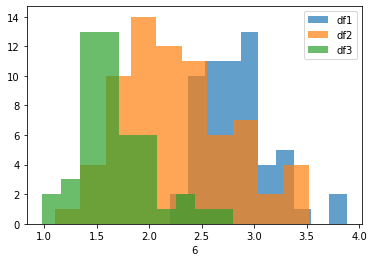

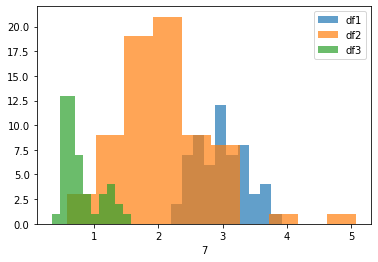

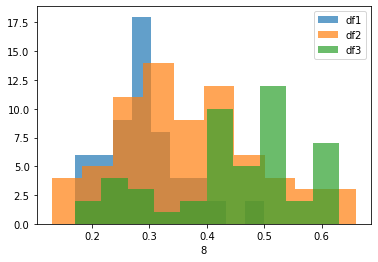

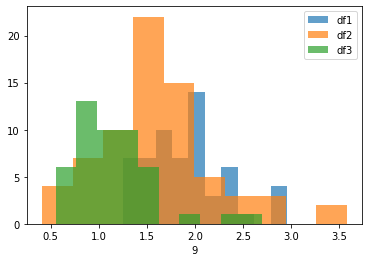

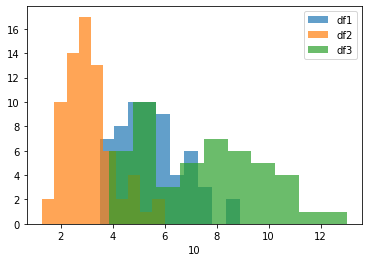

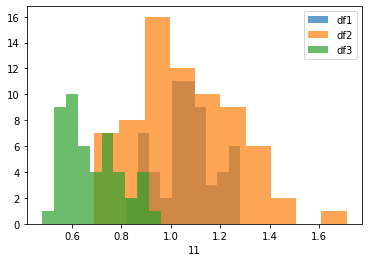

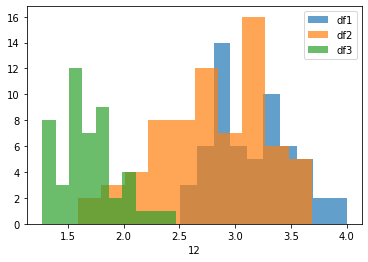

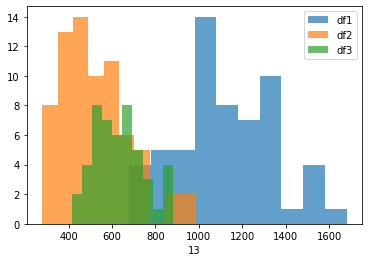

In [66]:
df1 = df[df[0] == 1]
df2 = df[df[0] == 2]
df3 = df[df[0] == 3]

for i in range(1, 14):
    plt.figure()
    plt.hist(df1[i], label='df1', alpha=0.7)
    plt.hist(df2[i], label='df2', alpha=0.7)
    plt.hist(df3[i], label='df3', alpha=0.7)
    plt.xlabel('{}'.format(i))
    plt.legend()

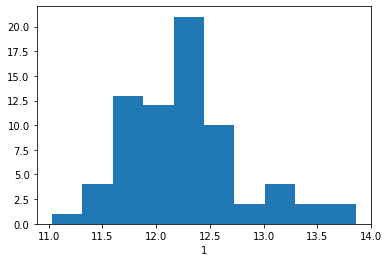

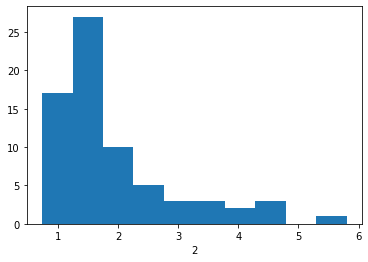

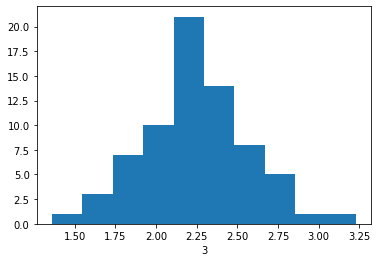

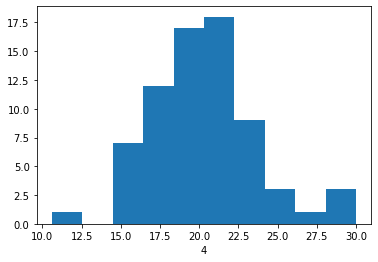

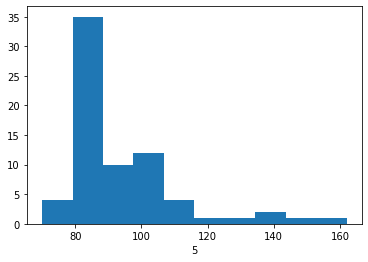

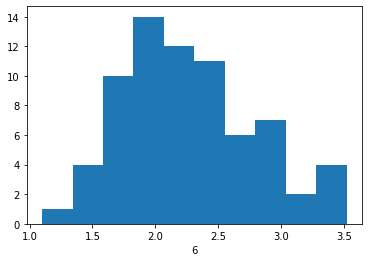

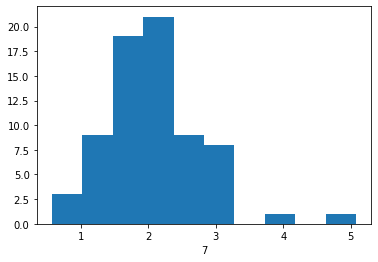

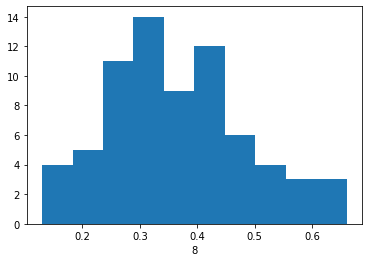

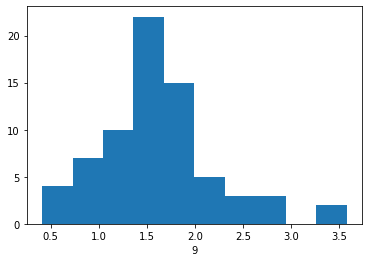

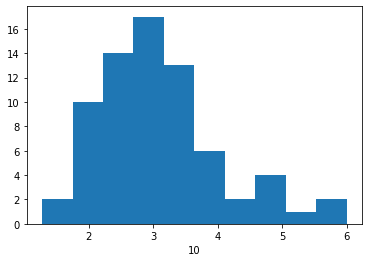

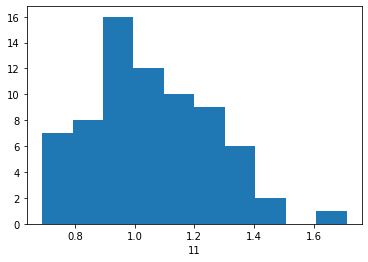

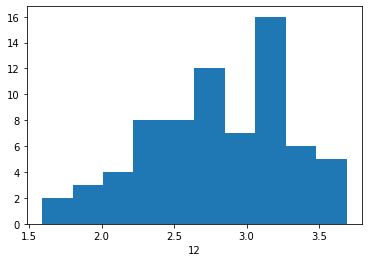

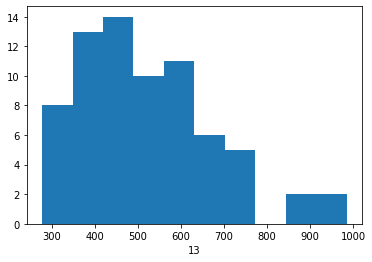

In [64]:
df2 = df[df[0] == 2]

for i in range(1, 14):
    plt.figure()
    plt.hist(df2[i])
    plt.xlabel('{}'.format(i))

# Problem 2 [Usenet News](https://en.wikipedia.org/wiki/Usenet_newsgroup) Classifications

At the dawn of internet. There exists a thing called usenet where people discuss various thing. Think about it as ancient reddit.

In this problem we will be learning about how to deal with large($n=20$) number of classes with ECOC.

The data is at **data/news_topic_train.csv.gz** and **data/news_topic_train.csv.gz**. You can just have panda read gzip file. No need to unzip it. The data is vectorized and cleaned data based on [20Newsgroups Dataset](http://qwone.com/~jason/20Newsgroups/). Read prepare.ipynb if you want to see what exactly I did in cleaning the data.

Our goal for this problem is to build a classifier which can read the discussion and figure out which topic the discussion belongs to.

**Don't forget to pad the data**

## Task 1
Why don't we use exhaustive matrix for this?

## Task 2
Supposed that we want to use 200 classifiers to do this. We could generate the code matrix randomly many many times.

Which criteria should we use in selecting the best code matrix?

Optional: you can get a better code matrix by doing hill climbing.

## Task 3
Build and ECOC classifier with 200 classifiers using **data/news_topic_test.csv.gz** and test the performance on **data/news_topic_train.csv.gz**(get the accuracy). Make sure you use a decent code table.